# Plotting Wind Properties
As described under [Models](../output/model.rst), SIROCCO saves wind properties in binary wind_save files. This notebook explains how to read and plot wind variables for the ```cv_standard``` file found in the examples. Before running the python commands, you need to run the model from the command line. I suggest running the following commands, after you have compiled python:

    mkdir cv_test
    cd cv_test
    cp $SIROCCO/examples/basic/cv_standard.pf .
    sirocco cv_standard </code>

The model will take about 5 minutes to run on a single core. It will not converge, but will give us a model to use as an example. You should then run ```windsave2table``` on the output

    windsave2table cv_standard

which will create a series of ascii files containing key variables in the wind cells. We will use these ascii files for our plots. 

## Making wind plots using PySi

We will start by demonstrating how to use PySi to plot data from the wind files. In particular we will plot some key variables in the wind, followed by some ion fractions. 

PySi works by setting up a ```Wind``` class which reads in and stores all the useful data and attributes from the model. This class can be used to inspect data or to plot it directly. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pysi 
from pysi.wind import Wind
root = "cv_standard"
directory = "cv_test/"
wind = Wind(root = root, directory = directory)

Version: UNKNOWN


The data can be plotted easily using the ```plot_parameter``` method. This method returns Figure and Axes objects so the plot can be modified easily. 

/Users/matthewsj/.virtualenvs/sirocco/lib/python3.10/site-packages/pysi/wind/model/plot.py:484: RuntimeWarning: divide by zero encountered in log10
  parameter_points = numpy.log10(parameter_points)


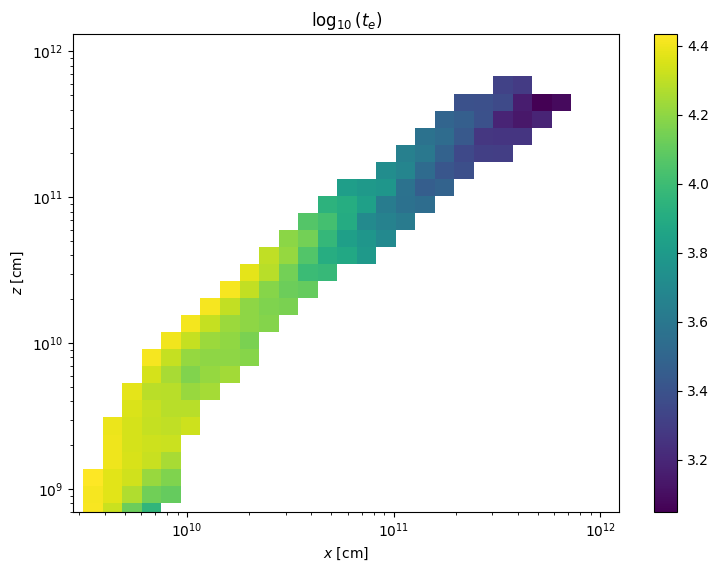

In [2]:
fig, ax = wind.plot_parameter("t_e")

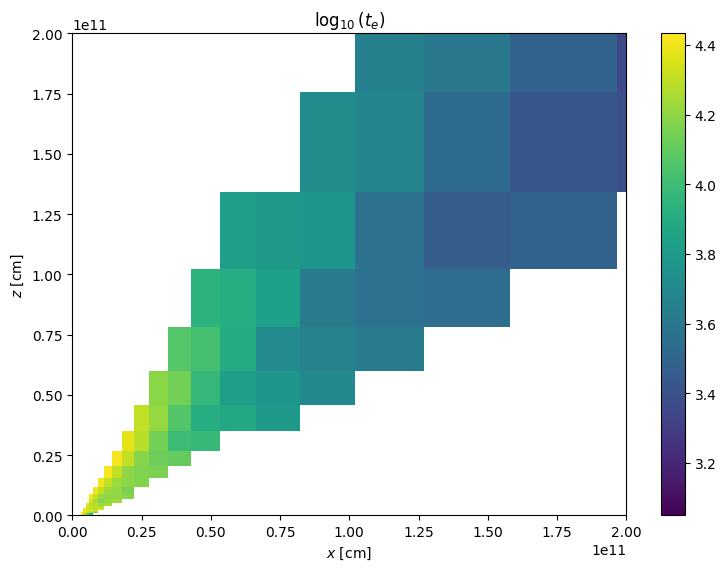

In [3]:
plot = wind.plot_parameter("t_e", "linlin")
plt.xlim(0,2e11)
_ = plt.ylim(0,2e11)

The ```get_windsave_descriptions``` method in the wind class comes provides a handy guide to the main columns in the .master.txt file, which can be plotted using the above methods, or accessed directly as, e.g., ```wind["ne"]```

In [4]:
print (wind.get_windsave_descriptions())

x          --  left-hand lower cell corner x-coordinate, cm
z          --  left-hand lower cell corner z-coordinate, cm
xcen       --  cell centre x-coordinate, cm
zcen       --  cell centre z-coordinate, cm
i          --  cell index (column)
j          --  cell index (row)
inwind     --  is the cell in wind (0), partially in wind (1) or out of wind (<0)
converge   --  how many convergence criteria is the cell failing?
v_x        --  x-velocity, cm/s
v_y        --  y-velocity, cm/s
v_z        --  z-velocity, cm/s
vol        --  volume in cm^3
rho        --  density in g/cm^3
ne         --  electron density in cm^-3
t_e        --  electron temperature in K
t_r        --  radiation temperature in K
h1         --  H1 ion fraction
he2        --  He2 ion fraction
c4         --  C4 ion fraction
n5         --  N5 ion fraction
o6         --  O6 ion fraction
dmo_dt_x   --  momentum rate, x-direction
dmo_dt_y   --  momentum rate, y-direction
dmo_dt_z   --  momentum rate, z-direction
ip         -

We can also use the multiplot command to generate multiple plots for specified wind parameters. 
This method creates subplots to visualize the specified wind parameters using either 1D or 2D 
representation based on the coordinate system.

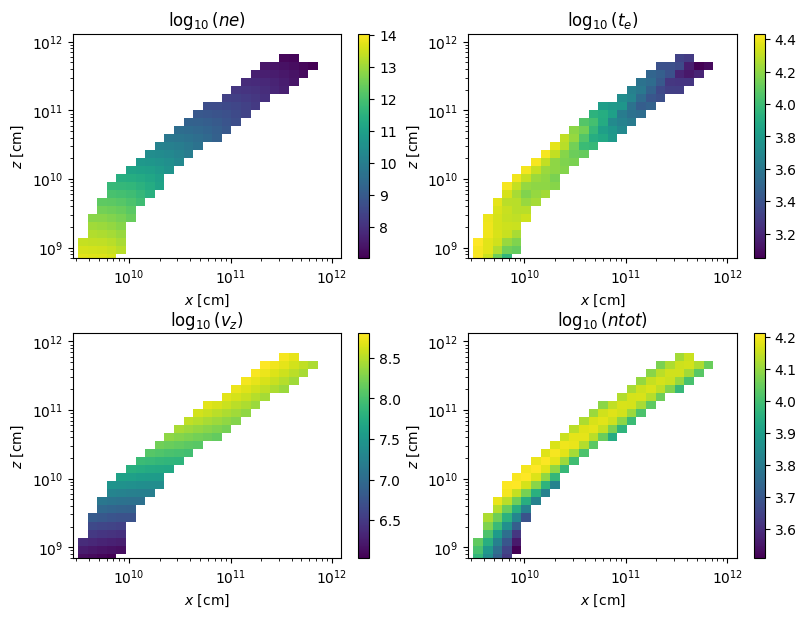

In [5]:
fig, ax = wind.multiplot( ("ne", "t_e", "v_z", "ntot") , "loglog", nrows = 2, ncols = 2)
fig.tight_layout(pad=0.05)

We can also check all the possible things to plot, some of which are intuitive and some of which aren't! 

In [6]:
print (wind.things_read_in)

dict_keys(['x', 'z', 'xcen', 'zcen', 'i', 'j', 'inwind', 'converge', 'v_x', 'v_y', 'v_z', 'vol', 'rho', 'ne', 't_e', 't_r', 'h1', 'he2', 'c4', 'n5', 'o6', 'dmo_dt_x', 'dmo_dt_y', 'dmo_dt_z', 'ip', 'xi', 'ntot', 'nrad', 'nioniz', 'w', 'ave_freq', 'J', 'J_direct', 'J_scatt', 'lum_tot', 'heat_tot', 'heat_comp', 'heat_line', 'heat_ff', 'heat_phot', 'heat_auge', 'cool_tot', 'cool_comp', 'lum_lines', 'cool_dr', 'lum_ff', 'lum_rr', 'cool_rr', 'cool_adia', 'heat_shoc', 'ht_ln_mac', 'ht_ph_mac', 'dv_x_dx', 'dv_y_dx', 'dv_z_dx', 'dv_x_dy', 'dv_y_dy', 'dv_z_dy', 'dv_x_dz', 'dv_y_dz', 'dv_z_dz', 'div_v', 'dvds_max', 'gamma', 'dfudge', 't_e_old', 'dt_e', 'dt_e_old', 't_r_old', 'heat_tot_', 'gain', 'macro_bf_', 'H_i01_frac', 'H_i02_frac', 'He_i01_frac', 'He_i02_frac', 'He_i03_frac', 'C_i01_frac', 'C_i02_frac', 'C_i03_frac', 'C_i04_frac', 'C_i05_frac', 'C_i06_frac', 'C_i07_frac', 'N_i01_frac', 'N_i02_frac', 'N_i03_frac', 'N_i04_frac', 'N_i05_frac', 'N_i06_frac', 'N_i07_frac', 'N_i08_frac', 'O_i01_fra

## Plotting ions using PySi 

PySi also allows one to plot ion fractions or densities (fractions by default), which are accessed through strings like ```Fe_i01_frac```, using astronomical notation for the ion stage. An example multiplot of the first six ionic stages of Carbon would be as follows. 

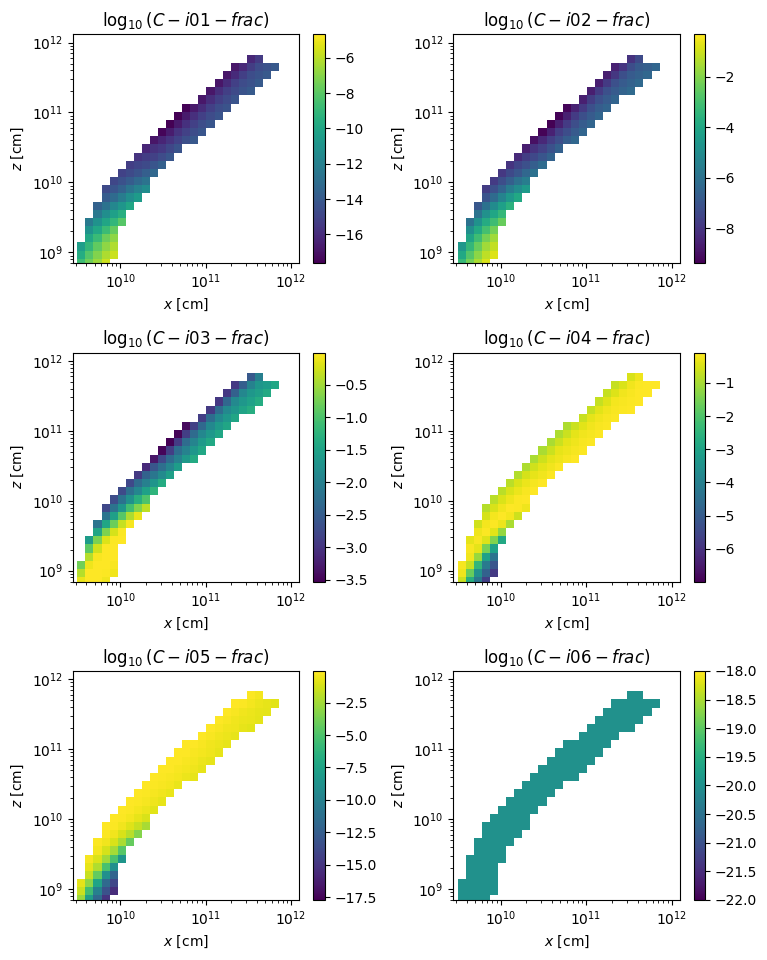

In [7]:
ions_to_plot = ["C_i{:02d}_frac".format(i+1) for i in range(6)] 
fig, ax = wind.multiplot(ions_to_plot, "loglog", nrows = 3, ncols = 2, figsize=(8,10))

All the ions in the simulation can be viewed using the ```ions_read_in``` list. 

In [8]:
print (wind.ions_read_in)

['H_i01_frac', 'H_i02_frac', 'He_i01_frac', 'He_i02_frac', 'He_i03_frac', 'C_i01_frac', 'C_i02_frac', 'C_i03_frac', 'C_i04_frac', 'C_i05_frac', 'C_i06_frac', 'C_i07_frac', 'N_i01_frac', 'N_i02_frac', 'N_i03_frac', 'N_i04_frac', 'N_i05_frac', 'N_i06_frac', 'N_i07_frac', 'N_i08_frac', 'O_i01_frac', 'O_i02_frac', 'O_i03_frac', 'O_i04_frac', 'O_i05_frac', 'O_i06_frac', 'O_i07_frac', 'O_i08_frac', 'O_i09_frac', 'Na_i01_frac', 'Na_i02_frac', 'Na_i03_frac', 'Na_i04_frac', 'Na_i05_frac', 'Na_i06_frac', 'Na_i07_frac', 'Na_i08_frac', 'Na_i09_frac', 'Na_i10_frac', 'Na_i11_frac', 'Na_i12_frac', 'Si_i01_frac', 'Si_i02_frac', 'Si_i03_frac', 'Si_i04_frac', 'Si_i05_frac', 'Si_i06_frac', 'Si_i07_frac', 'Si_i08_frac', 'Si_i09_frac', 'Si_i10_frac', 'Si_i11_frac', 'Si_i12_frac', 'Si_i13_frac', 'Si_i14_frac', 'Si_i15_frac', 'Ca_i01_frac', 'Ca_i02_frac', 'Ca_i03_frac', 'Ca_i04_frac', 'Ca_i05_frac', 'Ca_i06_frac', 'Ca_i07_frac', 'Ca_i08_frac', 'Ca_i09_frac', 'Ca_i10_frac', 'Ca_i11_frac', 'Ca_i12_frac', 'Ca_i

## More direct data access

We recommend using PySi where possible. You may, however, wish to get more direct access to the data, which can be done easily by reading in the ```cv_standard.master.txt``` file, for example using ```astropy```. In the next code block, we read in the data file and print out the columns.

In [9]:
import matplotlib.pyplot as plt
import astropy.io.ascii as io

fname = f"{directory}{root}.master.txt"
data = io.read(fname)

print (data.colnames)

['x', 'z', 'xcen', 'zcen', 'i', 'j', 'inwind', 'converge', 'v_x', 'v_y', 'v_z', 'vol', 'rho', 'ne', 't_e', 't_r', 'h1', 'he2', 'c4', 'n5', 'o6', 'dmo_dt_x', 'dmo_dt_y', 'dmo_dt_z', 'ip', 'xi', 'ntot', 'nrad', 'nioniz']


```py_plot_util``` also contains some routines for reshaping and masking arrays and so on. One of the most useful for plotting is the ```wind_to_masked``` function which turns the raw 1D flattened data into a masked 2D array with the right shape which can be easily used with ```pcolormesh``` and so on. Here's an example plot of the electron density in the model.

In [10]:
x, z, ne, inwind = util.wind_to_masked(data, value_string="ne", return_inwind=True)
plt.pcolormesh(x,z, np.log10(ne))
plt.loglog()
plt.xlim(1e9,1e12)
plt.ylim(1e8,1e12)
cbar = plt.colorbar()

NameError: name 'util' is not defined

This procedure can be used to plot any of the variables in the masterfile and is a good starting point for delving into the properties of the wind if not using PySi. 

Ion populations outputted from ```windsave2table``` are stored in files like ```cv_standard.C.frac.txt```, where the letter before frac denotes the element. Plots of the C III ion fraction can thus be made through commands like the following, where strings like ```i05``` index the ion for each file. 

In [ ]:
carbon_ion = io.read("cv_test/cv_standard.C.frac.txt")
x, z, c3_frac, inwind = util.wind_to_masked(carbon_ion, value_string="i03", return_inwind=True)
plt.pcolormesh(x,z, np.log10(c3_frac))
plt.loglog()
plt.xlim(1e9,1e12)
plt.ylim(1e8,1e12)
cbar = plt.colorbar()

## Make A Basic Quick Look Wind Plot

The simplest way to make a quick look plot of the electron temperature is using the ```plot_wind.py``` routine in ```$SIROCCO/py_progs```. In this example, I will assume py_progs has been added to ```$PATH``` and to ```$PYTHONPATH```. ```plot_wind.py``` can be run from the command line using

    plot_wind.py cv_standard t_e
    
where the second argument is the variable to plot. Alternatively, it can be run from within a python script by doing (where we are now assuming you are running this code from one directory above cv_test):

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import plot_wind
fname = "cv_test/cv_standard.master.txt"
plot_wind.doit(fname, var="t_e")